In [ ]:
# This notebook uses IEX's sandbox environment with unlimited monthly queries.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

from fbprophet import Prophet
from sklearn.metrics import mean_squared_error

In [8]:
import os
import requests

In [2]:
import env

credentials loaded successfully


In [3]:
import pyEX as p 

In [7]:
c = p.Client(api_token = env.token, version = 'stable')

In [15]:
import iexfinance as iex

In [16]:
os.environ['IEX_API_VERSION'] = 'iexcloud-sandbox'

In [17]:
os.environ['IEX_TOKEN'] = env.sandbox_token

In [18]:
from iexfinance.stocks import get_historical_data

In [19]:
start = datetime(2017, 1, 1)
end = datetime(2020, 12, 31)

In [20]:
spy = get_historical_data("SPY", start, end, output_format = 'pandas')

Text(0.5, 1.0, 'Daily Times Series for SPY')

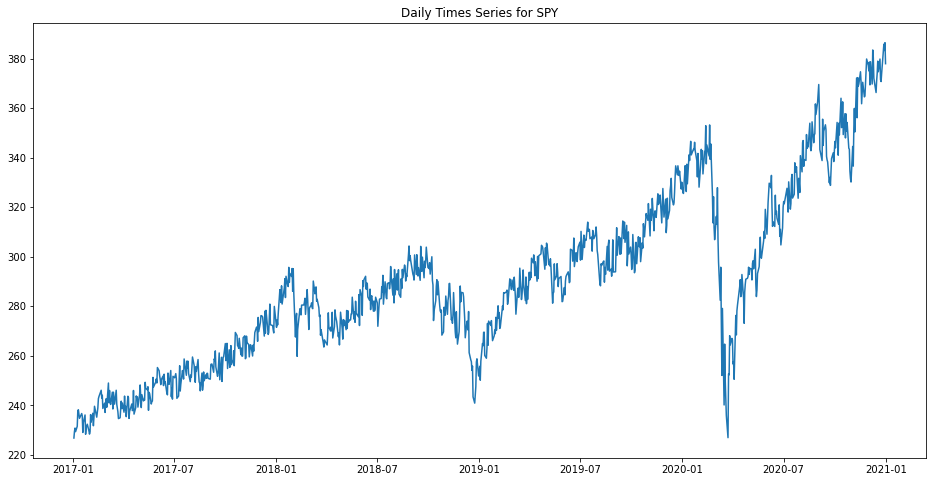

In [23]:
plt.figure(figsize = (16, 8))
plt.plot(spy.index, spy['close'])
plt.title("Daily Times Series for SPY")

In [27]:
tsla = get_historical_data("TSLA", start, end, output_format = 'pandas')

In [28]:
tsla

,open,high,low,close,volume
date,,,,,
2017-01-03,44.995,44.570,42.4970,44.985,30047151
2017-01-04,44.070,47.300,44.8090,45.745,57071257
2017-01-05,46.423,47.127,46.1400,45.750,30439255
2017-01-06,46.683,48.053,46.2600,46.095,28902918
2017-01-09,47.844,48.158,46.0000,46.377,20584587
...,...,...,...,...,...
2020-12-24,672.240,698.820,657.0000,678.070,23303773
2020-12-28,693.640,697.700,679.6000,692.950,32994737
2020-12-29,679.000,692.300,677.0000,670.480,23997183


Text(0.5, 1.0, 'Daily Times Series for TSLA')

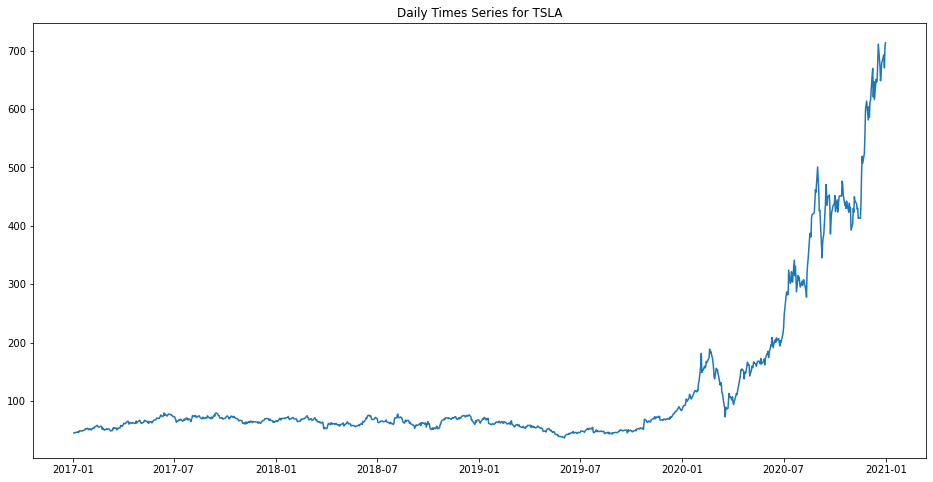

In [29]:
plt.figure(figsize = (16, 8))
plt.plot(tsla.index, tsla['close'])
plt.title("Daily Times Series for TSLA")